# Decision Tree - Heart disease prediction
Predict likelyhood of patient having heart disease
https://galaxyinferno.com/how-to-build-a-decision-tree-for-classification-with-python/

In [5]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataLink  = 'https://raw.githubusercontent.com/DUanalytics/datasets/master/csv/heart.csv'
df = pd.read_csv(dataLink)
df.shape

(918, 12)

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [15]:
print(df.groupby(by='HeartDisease', as_index=False).size())
#print(df.groupby(by='HeartDisease').value_counts(normalize=True))
# more heart diseases

   HeartDisease  size
0             0   410
1             1   508


In [22]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [25]:
catCols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope','HeartDisease' ]
print(df.groupby(by=catCols, as_index=False).size())

    Sex ChestPainType RestingECG ExerciseAngina ST_Slope  HeartDisease  size
0     F           ASY        LVH              N     Down             1     2
1     F           ASY        LVH              N     Flat             0     4
2     F           ASY        LVH              N     Flat             1     3
3     F           ASY        LVH              N       Up             0     4
4     F           ASY        LVH              N       Up             1     2
..   ..           ...        ...            ...      ...           ...   ...
142   M            TA     Normal              Y       Up             0     1
143   M            TA         ST              N     Down             1     1
144   M            TA         ST              N     Flat             1     2
145   M            TA         ST              N       Up             0     2
146   M            TA         ST              Y     Flat             1     1

[147 rows x 7 columns]


In [26]:
# IV and DV
X = df.drop('HeartDisease', axis=1)
y = df.HeartDisease
print(X.shape, y.shape)

(918, 11) (918,)


In [31]:
#Encoding Categorical data
# ST_Slope, ...
X_encoded = pd.get_dummies(X, drop_first = True)
#X_encoded.head()
y_encoded = pd.get_dummies(y, drop_first = True)
print(pd.concat([X_encoded, y_encoded], axis=1).head(2))

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
0   40        140          289          0    172      0.0      1   
1   49        160          180          0    156      1.0      0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_Normal  \
0                  1                  0                 0                  1   
1                  0                  1                 0                  1   

   RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  ST_Slope_Up  1  
0              0                 0              0            1  0  
1              0                 0              1            0  1  


In [32]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(642, 15) (276, 15) (642, 1) (276, 1)


In [33]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [34]:
# Accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [35]:
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
print(acc)

0.8442028985507246


In [36]:
#Optmising Hyperparameters
from sklearn.tree import DecisionTreeClassifier

best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [2,3,4,5,6]:
        for min_samples_leaf in [5, 10, 20, 30]:
            dtree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(X_train, y_train)
            predicitions = dtree.predict(X_test)
            acc = accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                best_acc = acc

In [37]:
print(' Best Accuracy - ', best_acc, ', Max Depth- ' , max_depth, ', \n Criterion - ',  criterion, ', Min Samples - ', min_samples_leaf)

 Best Accuracy -  0.8695652173913043 , Max Depth-  6 , 
 Criterion -  entropy , Min Samples -  30


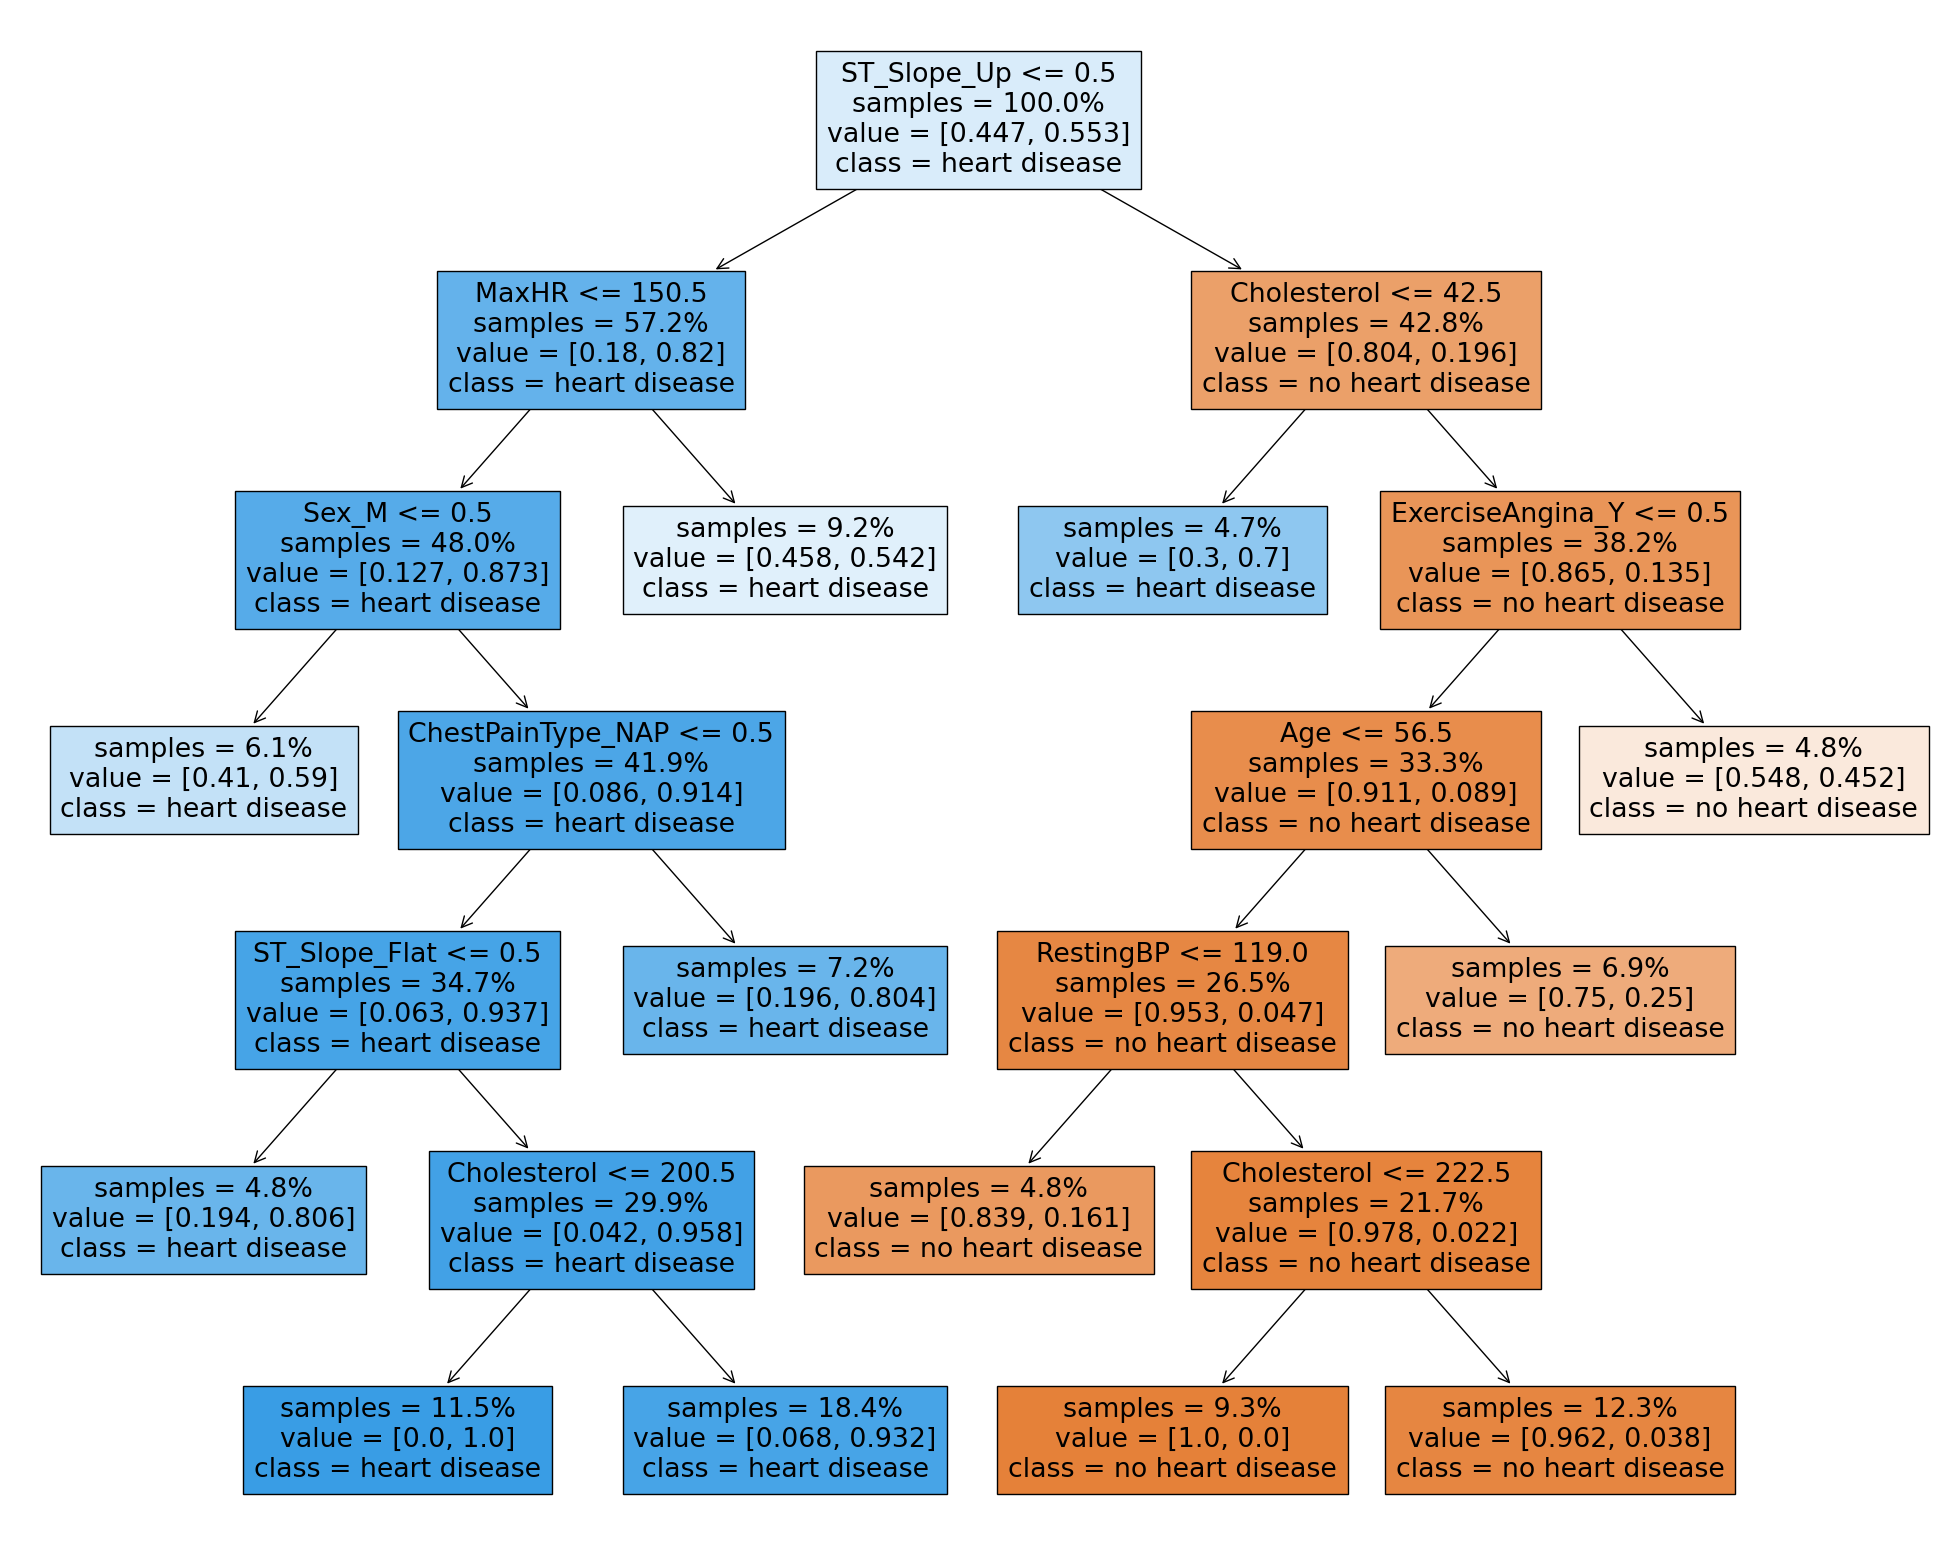

In [38]:
#Visualise
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = X_encoded.columns,
            class_names=['no heart disease', 'heart disease'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test.png')